## Compare w/maggi 2015 TL 

In [110]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import csv
import os
from datetime import datetime
import re

import pyet
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [116]:
#for 2015
dff=pd.read_csv('Treeline_HrlySummary_2015.csv')

dff

,DateTime,Precipitation-mm,AirTemperature-C,SolarRadiation-Watts/m2,RelativeHumidity-%,WindDirection-Degree,WindSpeed-m/s,SnowDepth-cm,NetRadiation-Watts/m2,Raf
0,1/1/2015 0:00,0.0,-15.3,0.00,90.60,31.59,0.0,32.6,17.5,17.5
1,1/1/2015 1:00,0.1,-16.0,0.00,88.80,352.50,0.0,32.3,15,15
2,1/1/2015 2:00,0.1,-15.6,0.00,90.10,312.60,0.0,32.2,13.4,13.4
3,1/1/2015 3:00,0.1,-15.8,0.19,89.40,298.70,0.0,32.1,15.19,15.19
4,1/1/2015 4:00,0.1,-16.2,0.00,89.30,0.00,0.0,31.9,13.4,13.4
...,...,...,...,...,...,...,...,...,...,...
8755,12/31/2015 19:00,671.4,-12.2,0.00,90.50,306.10,0.3,31.1,-45.12,-45.12
8756,12/31/2015 20:00,671.4,-11.1,0.00,80.80,290.60,0.7,31,-41.4,-41.4
8757,12/31/2015 21:00,671.4,-11.2,0.00,77.38,327.10,0.5,31,-43.18,-43.18
8758,12/31/2015 22:00,671.4,-11.7,0.00,82.70,329.60,0.3,30.9,-41.58,-41.58


In [120]:
print(dff['NetRadiation-Watts/m2'].dtype)

object


In [125]:
dff['NetRadiation-Watts/m2'] = pd.to_numeric(dff['NetRadiation-Watts/m2'], errors='coerce')
dff['NetRadiation-Watts/m2'] = dff['NetRadiation-Watts/m2'].astype(float)

#dff['NetRadiation-Watts/m2'] = dff['NetRadiation-Watts/m2'].astype(float)
print(dff['NetRadiation-Watts/m2'].dtype)

float64


In [126]:
dff['Date'] = pd.to_datetime(dff['DateTime'])
#dff = dff.dropna(subset=['NetRadiation-Watts/m2'])
#dff.dropna(subset=['NetRadiation-Watts/m2'], inplace=True)

In [127]:
dff['SolarRadiation-Watts/m2']=(dff['SolarRadiation-Watts/m2'])*3600
dff['NetRadiation-Watts/m2']=dff['NetRadiation-Watts/m2']*3600


In [128]:
dff

,DateTime,Precipitation-mm,AirTemperature-C,SolarRadiation-Watts/m2,RelativeHumidity-%,WindDirection-Degree,WindSpeed-m/s,SnowDepth-cm,NetRadiation-Watts/m2,Raf,Date
0,1/1/2015 0:00,0.0,-15.3,0.0,90.60,31.59,0.0,32.6,63000.0,17.5,2015-01-01 00:00:00
1,1/1/2015 1:00,0.1,-16.0,0.0,88.80,352.50,0.0,32.3,54000.0,15,2015-01-01 01:00:00
2,1/1/2015 2:00,0.1,-15.6,0.0,90.10,312.60,0.0,32.2,48240.0,13.4,2015-01-01 02:00:00
3,1/1/2015 3:00,0.1,-15.8,684.0,89.40,298.70,0.0,32.1,54684.0,15.19,2015-01-01 03:00:00
4,1/1/2015 4:00,0.1,-16.2,0.0,89.30,0.00,0.0,31.9,48240.0,13.4,2015-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31/2015 19:00,671.4,-12.2,0.0,90.50,306.10,0.3,31.1,-162432.0,-45.12,2015-12-31 19:00:00
8756,12/31/2015 20:00,671.4,-11.1,0.0,80.80,290.60,0.7,31,-149040.0,-41.4,2015-12-31 20:00:00
8757,12/31/2015 21:00,671.4,-11.2,0.0,77.38,327.10,0.5,31,-155448.0,-43.18,2015-12-31 21:00:00
8758,12/31/2015 22:00,671.4,-11.7,0.0,82.70,329.60,0.3,30.9,-149688.0,-41.58,2015-12-31 22:00:00


In [133]:
import pandas as pd

daily_data = dff.groupby(dff['Date'].dt.strftime('%m/%d/%Y')).agg({
    'Precipitation-mm': 'sum',
    'AirTemperature-C': ['min', 'max', 'mean'],  # Calculate min, max, and mean for temperature
    'SolarRadiation-Watts/m2': 'sum',
    'NetRadiation-Watts/m2': 'sum',
    'RelativeHumidity-%': ['min', 'max', 'mean'],
    'WindDirection-Degree': 'mean',
    'WindSpeed-m/s': 'mean',
    'SnowDepth-cm': 'sum'
}).reset_index()

daily_data['SolarRadiation-Watts/m2'] = daily_data['SolarRadiation-Watts/m2'] / 1000000

daily_data['NetRadiation-Watts/m2'] = daily_data['NetRadiation-Watts/m2']/1000000

daily_data.columns = ['Date', 'Precipitation_mm', 'Tmin_C', 'Tmax_C', 'Tmean_C',
                       'SolarRadiation_MJ/m2/day', 'NetRadiation_MJ/m2/day', 'RelativeHumidity_min','RelativeHumidity_max','RelativeHumidity_mean',
                       'WindDirection_degree', 'WindSpeed_m/s', 'SnowDepth_cm']

# Save the transformed data to a new CSV file
daily_data.to_csv('TL_2015.csv', index=False)
daily_data

,Date,Precipitation_mm,Tmin_C,Tmax_C,Tmean_C,SolarRadiation_MJ/m2/day,NetRadiation_MJ/m2/day,RelativeHumidity_min,RelativeHumidity_max,RelativeHumidity_mean,WindDirection_degree,WindSpeed_m/s,SnowDepth_cm
0,01/01/2015,131.0,-16.4,-8.5,-13.716667,2.771820,-0.807372,80.80,90.90,87.912500,224.229167,0.070833,32.632.332.232.131.9323231.731.330.830.730.730...
1,01/02/2015,263.9,-15.7,-5.1,-10.491667,2.603736,-1.157076,64.32,91.40,81.063750,274.750000,0.341667,30.630.530.530.530.530.430.33029.929.829.829.7...
2,01/03/2015,296.2,-6.2,-1.0,-3.929167,1.729080,-1.840068,65.14,85.20,75.830417,231.601667,0.833333,30.930.630.33029.9303029.929.829.829.729.529.3...
3,01/04/2015,333.1,-2.9,0.2,-1.687500,1.577700,0.118332,75.10,100.20,87.620417,151.047500,0.420833,29.529.529.429.429.429.529.629.629.529.429.129...
4,01/05/2015,452.6,1.3,4.0,2.687500,2.168064,0.572076,66.18,91.00,75.720417,255.217917,0.958333,31.73232.13231.831.631.631.731.631.531.43130.5...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2015,16108.8,-12.8,-6.8,-9.037500,3.517884,-1.291356,41.61,79.17,57.097083,112.254167,1.129167,37.237.13736.836.736.736.736.636.536.436.135.8...
361,12/28/2015,16108.8,-12.4,-7.0,-9.695833,7.078392,1.032336,58.83,86.90,75.763333,216.525417,1.554167,35.1353535.135.13534.834.634.634.634.534.434.1...
362,12/29/2015,16108.8,-10.2,-7.1,-8.700000,4.342068,-0.681048,71.51,93.10,84.590000,301.585000,1.654167,33.933.833.633.533.533.533.433.333.333.23332.9...
363,12/30/2015,16108.8,-9.6,-6.4,-8.212500,6.605172,0.548388,61.11,85.30,72.270000,157.730833,1.066667,32.532.532.532.532.432.432.432.332.131.931.831...


In [134]:
df=pd.read_csv('TL_2015.csv')
#df['NetRadiation_MJ/m2/day']=df['NetRadiation_MJ/m2/day']/10000000
tmean=df['Tmean_C']
df

,Date,Precipitation_mm,Tmin_C,Tmax_C,Tmean_C,SolarRadiation_MJ/m2/day,NetRadiation_MJ/m2/day,RelativeHumidity_min,RelativeHumidity_max,RelativeHumidity_mean,WindDirection_degree,WindSpeed_m/s,SnowDepth_cm
0,01/01/2015,131.0,-16.4,-8.5,-13.716667,2.771820,-0.807372,80.80,90.90,87.912500,224.229167,0.070833,32.632.332.232.131.9323231.731.330.830.730.730...
1,01/02/2015,263.9,-15.7,-5.1,-10.491667,2.603736,-1.157076,64.32,91.40,81.063750,274.750000,0.341667,30.630.530.530.530.530.430.33029.929.829.829.7...
2,01/03/2015,296.2,-6.2,-1.0,-3.929167,1.729080,-1.840068,65.14,85.20,75.830417,231.601667,0.833333,30.930.630.33029.9303029.929.829.829.729.529.3...
3,01/04/2015,333.1,-2.9,0.2,-1.687500,1.577700,0.118332,75.10,100.20,87.620417,151.047500,0.420833,29.529.529.429.429.429.529.629.629.529.429.129...
4,01/05/2015,452.6,1.3,4.0,2.687500,2.168064,0.572076,66.18,91.00,75.720417,255.217917,0.958333,31.73232.13231.831.631.631.731.631.531.43130.5...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2015,16108.8,-12.8,-6.8,-9.037500,3.517884,-1.291356,41.61,79.17,57.097083,112.254167,1.129167,37.237.13736.836.736.736.736.636.536.436.135.8...
361,12/28/2015,16108.8,-12.4,-7.0,-9.695833,7.078392,1.032336,58.83,86.90,75.763333,216.525417,1.554167,35.1353535.135.13534.834.634.634.634.534.434.1...
362,12/29/2015,16108.8,-10.2,-7.1,-8.700000,4.342068,-0.681048,71.51,93.10,84.590000,301.585000,1.654167,33.933.833.633.533.533.533.433.333.333.23332.9...
363,12/30/2015,16108.8,-9.6,-6.4,-8.212500,6.605172,0.548388,61.11,85.30,72.270000,157.730833,1.066667,32.532.532.532.532.432.432.432.332.131.931.831...


In [135]:
pet_penman_2015 = pyet.combination.pm(tmean,tmax=df['Tmax_C'],tmin=df['Tmin_C'],wind=df['WindSpeed_m/s'],rs=df['SolarRadiation_MJ/m2/day'],rn=df['NetRadiation_MJ/m2/day'],rhmax=df['RelativeHumidity_max'],
                    elevation=1850,
                    rhmin=df['RelativeHumidity_min'],rh=df['RelativeHumidity_mean'])
pet_penman_2015

0      0.000000
1      0.000000
2      0.000000
3      0.074154
4      0.321290
         ...   
360    0.142030
361    0.327564
362    0.103441
363    0.239542
364    0.116909
Name: Penman_Monteith, Length: 365, dtype: float64

In [136]:
df['pet_penman_2015']=pet_penman_2015
df

,Date,Precipitation_mm,Tmin_C,Tmax_C,Tmean_C,SolarRadiation_MJ/m2/day,NetRadiation_MJ/m2/day,RelativeHumidity_min,RelativeHumidity_max,RelativeHumidity_mean,WindDirection_degree,WindSpeed_m/s,SnowDepth_cm,pet_penman_2015
0,01/01/2015,131.0,-16.4,-8.5,-13.716667,2.771820,-0.807372,80.80,90.90,87.912500,224.229167,0.070833,32.632.332.232.131.9323231.731.330.830.730.730...,0.000000
1,01/02/2015,263.9,-15.7,-5.1,-10.491667,2.603736,-1.157076,64.32,91.40,81.063750,274.750000,0.341667,30.630.530.530.530.530.430.33029.929.829.829.7...,0.000000
2,01/03/2015,296.2,-6.2,-1.0,-3.929167,1.729080,-1.840068,65.14,85.20,75.830417,231.601667,0.833333,30.930.630.33029.9303029.929.829.829.729.529.3...,0.000000
3,01/04/2015,333.1,-2.9,0.2,-1.687500,1.577700,0.118332,75.10,100.20,87.620417,151.047500,0.420833,29.529.529.429.429.429.529.629.629.529.429.129...,0.074154
4,01/05/2015,452.6,1.3,4.0,2.687500,2.168064,0.572076,66.18,91.00,75.720417,255.217917,0.958333,31.73232.13231.831.631.631.731.631.531.43130.5...,0.321290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2015,16108.8,-12.8,-6.8,-9.037500,3.517884,-1.291356,41.61,79.17,57.097083,112.254167,1.129167,37.237.13736.836.736.736.736.636.536.436.135.8...,0.142030
361,12/28/2015,16108.8,-12.4,-7.0,-9.695833,7.078392,1.032336,58.83,86.90,75.763333,216.525417,1.554167,35.1353535.135.13534.834.634.634.634.534.434.1...,0.327564
362,12/29/2015,16108.8,-10.2,-7.1,-8.700000,4.342068,-0.681048,71.51,93.10,84.590000,301.585000,1.654167,33.933.833.633.533.533.533.433.333.333.23332.9...,0.103441
363,12/30/2015,16108.8,-9.6,-6.4,-8.212500,6.605172,0.548388,61.11,85.30,72.270000,157.730833,1.066667,32.532.532.532.532.432.432.432.332.131.931.831...,0.239542


C:\Users\skyebensel\AppData\Local\Temp\ipykernel_5416\206409429.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 4)
C:\Users\skyebensel\AppData\Local\Temp\ipykernel_5416\206409429.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45,fontsize=5)
C:\Users\skyebensel\AppData\Local\Temp\ipykernel_5416\206409429.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45,fontsize=5)


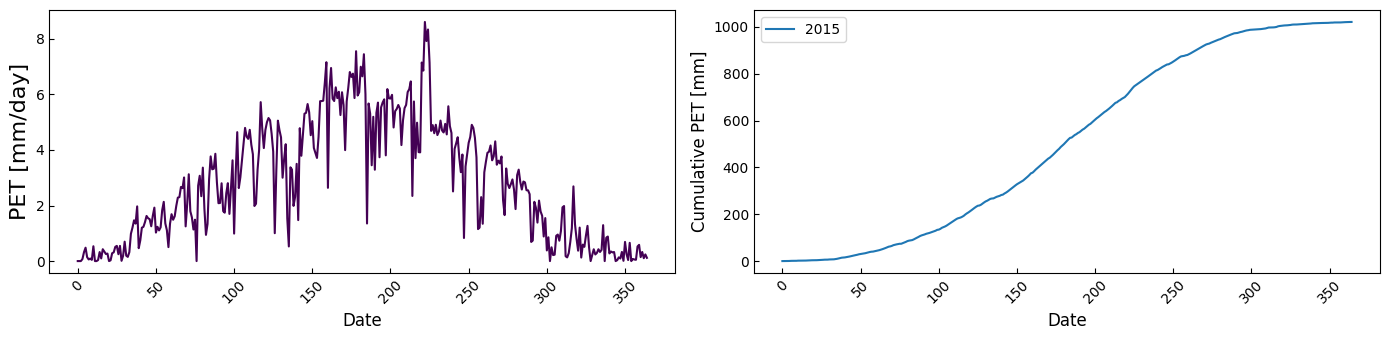

In [137]:
from matplotlib import cm
viridis = cm.get_cmap('viridis', 4)
colors = [viridis(i) for i in range(0, 4)]

fig, axs = plt.subplots(figsize=(14,3.5), ncols=2)
axs[0].plot(df['pet_penman_2015'],c=colors[0],label="2015")
axs[0].set_ylabel("PET [mm/day]", fontsize=16)
axs[1].plot(df['pet_penman_2015'].cumsum(),label="2015")
axs[1].set_ylabel("Cumulative PET [mm]", fontsize=12)

for i in (0,1):
    axs[i].set_xlabel("Date", fontsize=12)
    #axs[i].set_xticks(df['Date'][df['Date'].dt.day == 1])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45,fontsize=5)
    axs[i].tick_params("both", direction="in", labelsize=10)
plt.legend()
plt.tight_layout()
#plt.savefig("Figure1.png", dpi=300)